<a href="https://colab.research.google.com/github/Slinking196/Inteligencia-Artificial/blob/main/Copia_de_Labortorio_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Laboratorio 2: Regresión Lineal**

Integrantes:

*   Matías Bugueño
*   Jorge Villarreal
*   Reinaldo Foitzick
*   Joseph Donoso

## **Análisis exploratorio de datos**

### Librerías:

In [96]:
import pandas as pd
from plotnine import *
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
from sklearn.model_selection import train_test_split

### DataFrames:

In [97]:
wineQualityRed = pd.read_csv("winequality-red.csv", sep= ';')
wineQualityWhite = pd.read_csv("winequality-white.csv", sep= ';')

In [98]:
wineQualityRed.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


In [99]:
wineQualityWhite.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
5,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
6,6.2,0.32,0.16,7.0,0.045,30.0,136.0,0.9949,3.18,0.47,9.6,6
7,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
8,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
9,8.1,0.22,0.43,1.5,0.044,28.0,129.0,0.9938,3.22,0.45,11.0,6


### Análisis de los datos

In [100]:
wineQualityRed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [101]:
wineQualityWhite.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


<Axes: >

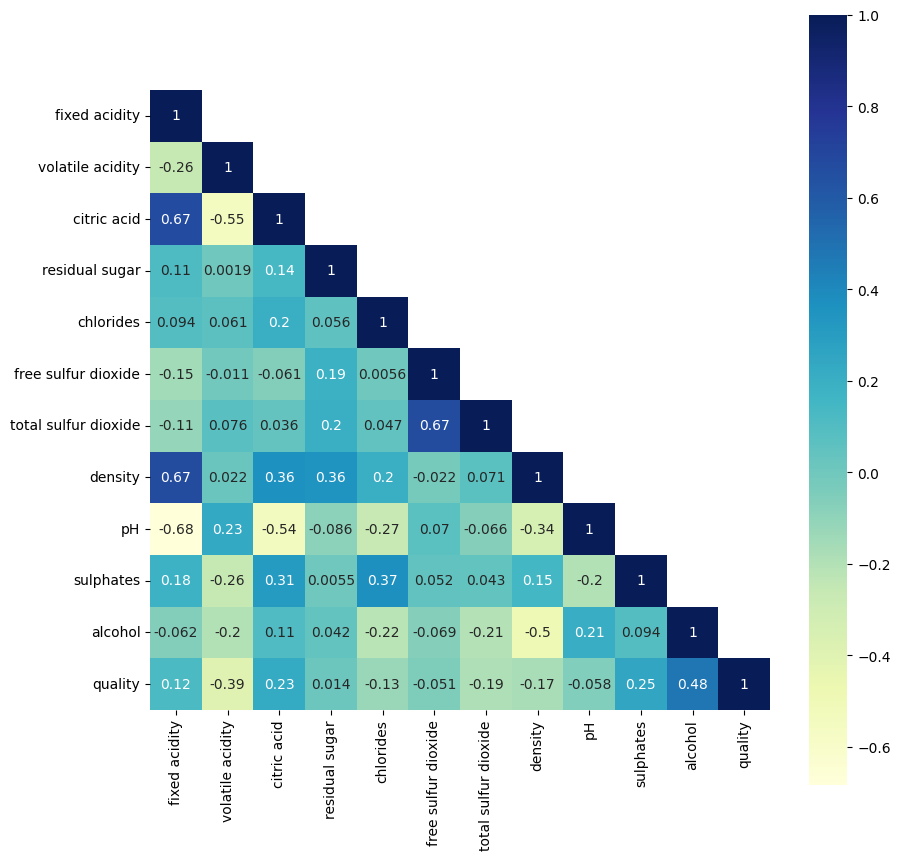

In [102]:
correlation = wineQualityRed.corr()
mask = np.array(correlation)
mask[np.tril_indices_from(mask)] = False
fig=plt.gcf()
fig.set_size_inches(10,10)
sns.heatmap(data=correlation,mask=mask,square=True,annot=True,cbar=True,cmap="YlGnBu")

<Axes: >

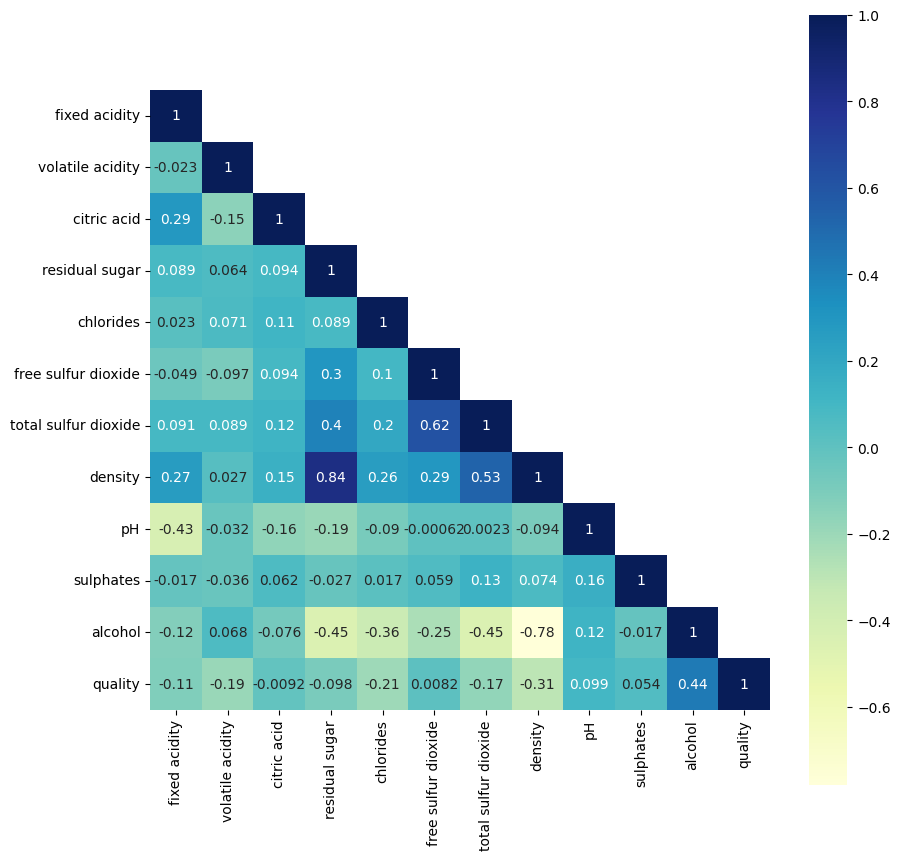

In [103]:
correlation = wineQualityWhite.corr()
mask = np.array(correlation)
mask[np.tril_indices_from(mask)] = False
fig=plt.gcf()
fig.set_size_inches(10,10)
sns.heatmap(data=correlation,mask=mask,square=True,annot=True,cbar=True,cmap="YlGnBu")

In [104]:
#sns.pairplot(wineQualityRed)

In [105]:
#sns.pairplot(wineQualityWhite)

### Elección de variables que predicen la calidad del vino

#### Variables para el vino rojo

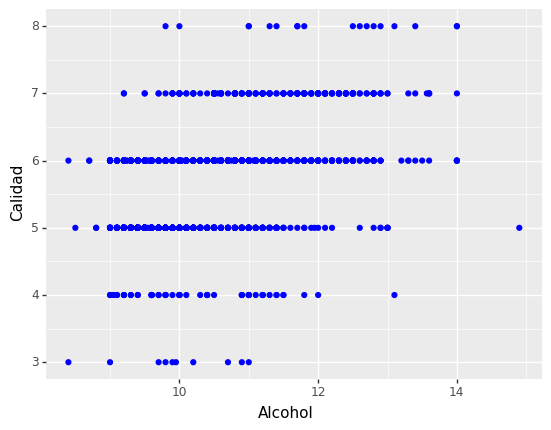

<ggplot: (8735956609409)>

In [106]:
(ggplot(wineQualityRed)+
 aes(x="alcohol", y="quality")+
 xlab("Alcohol")+
 ylab("Calidad")+
 geom_point(color="blue")
 )

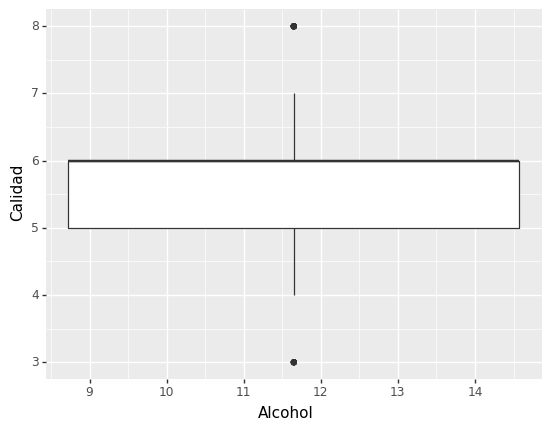

<ggplot: (8735959529548)>

In [107]:
(ggplot(wineQualityRed)+
 aes(x="alcohol", y="quality")+
 xlab("Alcohol")+
 ylab("Calidad")+
 geom_boxplot()
 )

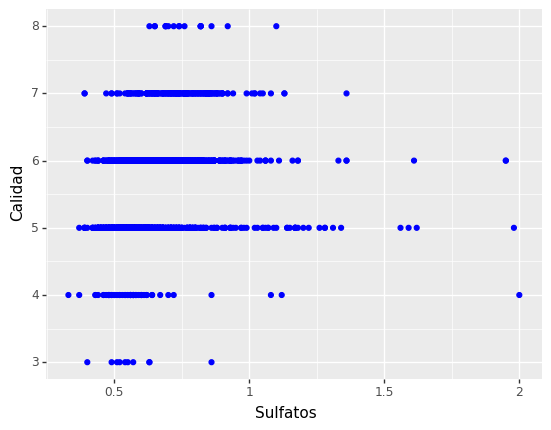

<ggplot: (8735956694146)>

In [108]:
(ggplot(wineQualityRed)+
 aes(x="sulphates", y="quality")+
 xlab("Sulfatos")+
 ylab("Calidad")+
 geom_point(color="blue")
 )

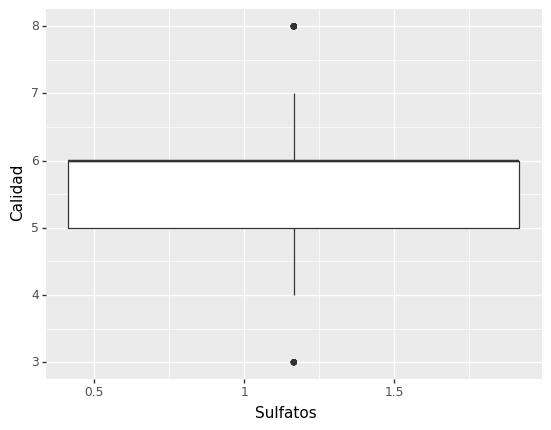

<ggplot: (8735955105579)>

In [109]:
(ggplot(wineQualityRed)+
 aes(x="sulphates", y="quality")+
 xlab("Sulfatos")+
 ylab("Calidad")+
 geom_boxplot()
 )

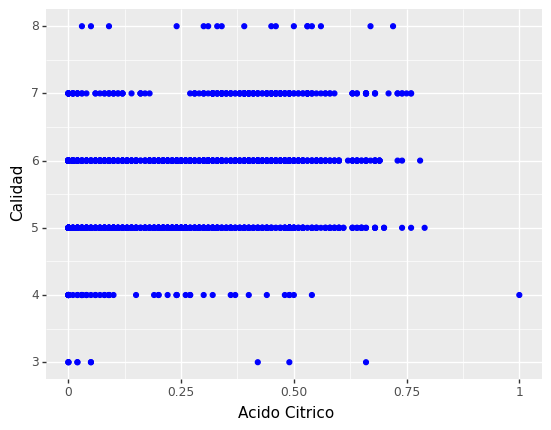

<ggplot: (8735956150251)>

In [110]:
(ggplot(wineQualityRed)+
 aes(x="citric acid", y="quality")+
 xlab("Acido Citrico")+
 ylab("Calidad")+
 geom_point(color="blue")
 )

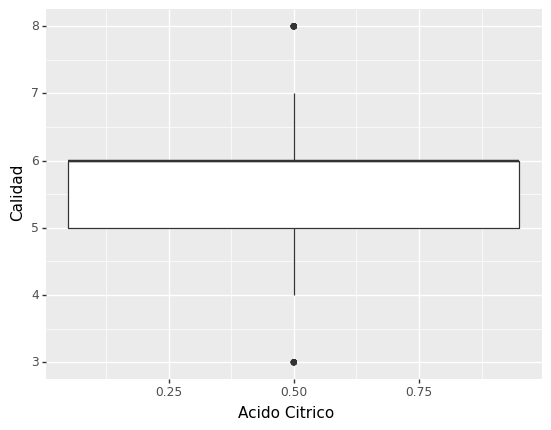

<ggplot: (8735954948628)>

In [111]:
(ggplot(wineQualityRed)+
 aes(x="citric acid", y="quality")+
 xlab("Acido Citrico")+
 ylab("Calidad")+
 geom_boxplot()
 )

#### Variables para el vino blanco

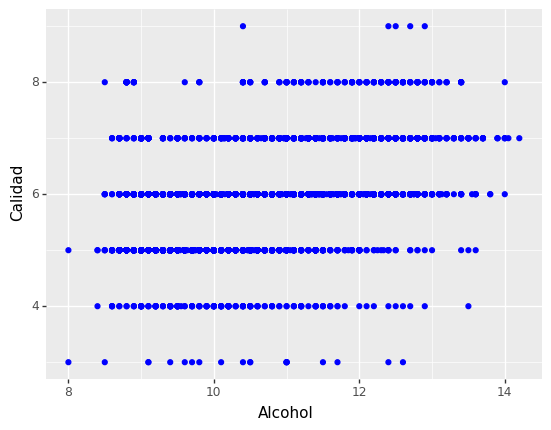

<ggplot: (8735955032551)>

In [112]:
(ggplot(wineQualityWhite)+
 aes(x="alcohol", y="quality")+
 xlab("Alcohol")+
 ylab("Calidad")+
 geom_point(color="blue")
 )

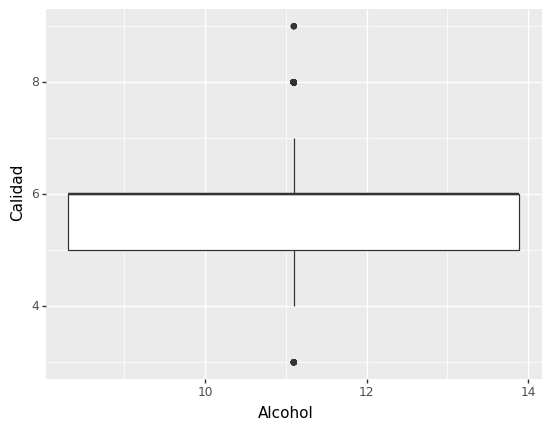

<ggplot: (8735954904251)>

In [113]:
(ggplot(wineQualityWhite)+
 aes(x="alcohol", y="quality")+
 xlab("Alcohol")+
 ylab("Calidad")+
 geom_boxplot()
 )

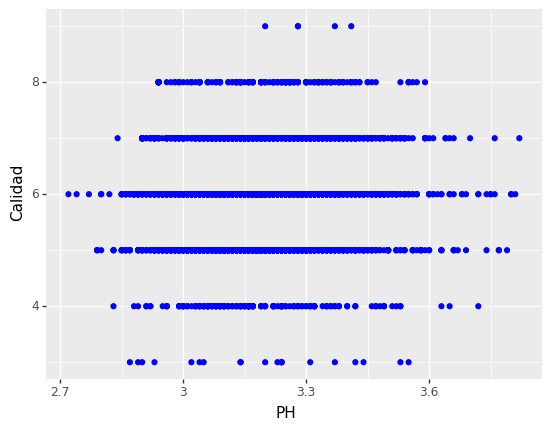

<ggplot: (8735954928109)>

In [114]:
(ggplot(wineQualityWhite)+
 aes(x="pH", y="quality")+
 xlab("PH")+
 ylab("Calidad")+
 geom_point(color="blue")
 )

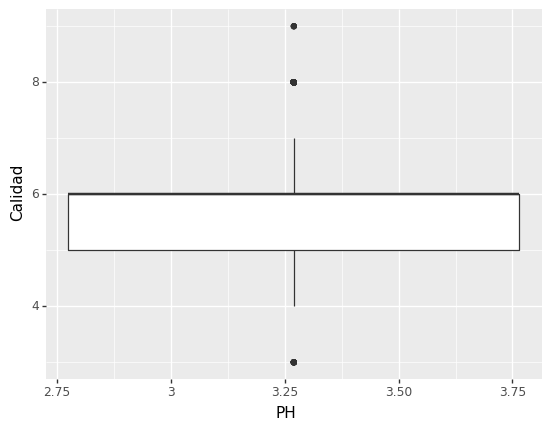

<ggplot: (8735955003741)>

In [115]:
(ggplot(wineQualityWhite)+
 aes(x="pH", y="quality")+
 xlab("PH")+
 ylab("Calidad")+
 geom_boxplot()
 )

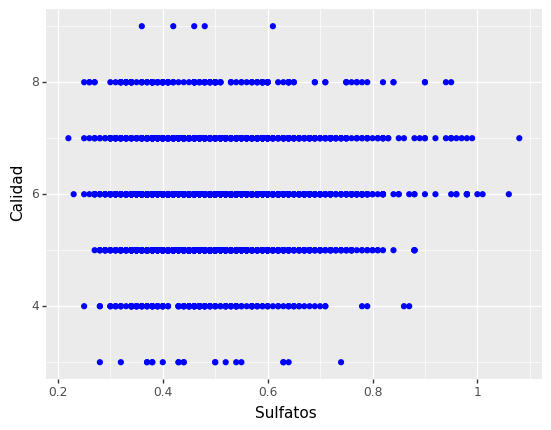

<ggplot: (8735954743867)>

In [116]:
(ggplot(wineQualityWhite)+
 aes(x="sulphates", y="quality")+
 xlab("Sulfatos")+
 ylab("Calidad")+
 geom_point(color="blue")
 )

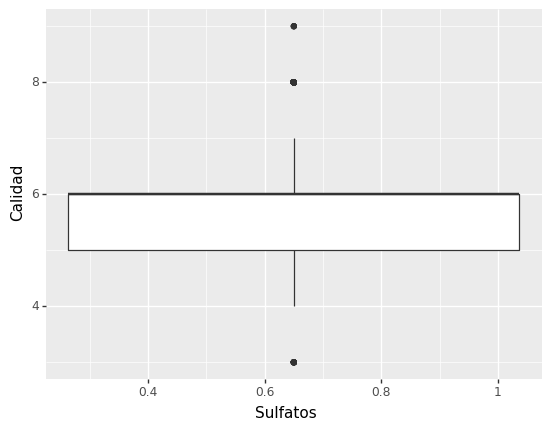

<ggplot: (8735955066304)>

In [117]:
(ggplot(wineQualityWhite)+
 aes(x="sulphates", y="quality")+
 xlab("Sulfatos")+
 ylab("Calidad")+
 geom_boxplot()
 )

## **Regresiones Lineales**

### Funciones de Regresión Lineal:

#### Algoritmo Batch gradient descent

In [118]:
# l = Factor de aprendizaje
def batch_gd(x, y, l = 0.0001,epocas = 2000):
  m = 0
  c = 0
  n = float(len(x)) #Cantidad de elementos

  for i in range(epocas):
    y_pred = m*x + c #Actual predicción de la variable y
    D_m = (-2/n ) * sum(x * (y - y_pred)) #Derivada parcial de m
    D_c = (-2/n ) * sum(y - y_pred) #Derivada parcial de c
    #Se actualizan las variables
    m = m - l * D_m
    c = c - l * D_c

  return m,c

#### Algoritmo Stochastic gradient descent

In [145]:
# l = Factor de aprendizaje
def stochastic_gd(x,y, epochs, l= 0.001):
    x = np.array(x)
    y = np.array(y)
    xlen = len(x)
    m = 1 # Pendiente buscada
    c = 1 # Intercepto buscado

    for step in range(0, epochs):
        m_gradient = 0
        c_gradient = 0
        N = float(xlen) # Cantidad de elementos
        for i in range(0, xlen):
            # Toma un indice random del arreglo para llevar a cabo el calculo
            indice_random = np.random.randint(xlen)
            m_gradient -= (2/N) * (y[indice_random] - (m + c * x[indice_random]))
            c_gradient -= (2/N) * (y[indice_random] - (m + c * x[indice_random])) * x[i]
            
        m = m - (l * m_gradient)
        c = c - (l * c_gradient)

    return m, c

### Regresiones lineales para el vino rojo

#### Tablas con los resultados de las 3 variables

In [120]:
resultados_prediccion_vinoRojo = pd.DataFrame()

#### Variable: Alcohol

In [121]:
x = wineQualityRed['alcohol']
y = wineQualityRed['quality']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42)

In [122]:
theta = stochastic_gd(x_train, y_train, 50)

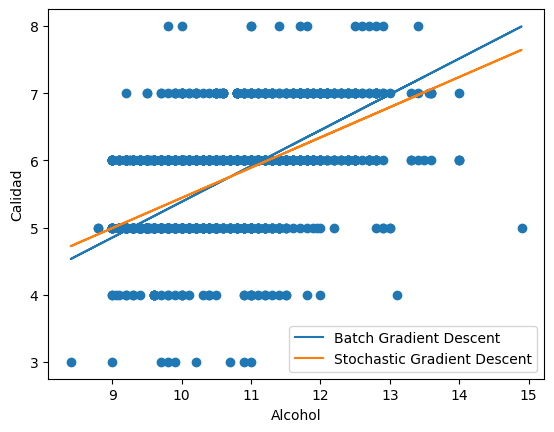

In [123]:
theta = stochastic_gd(x_train, y_train, 50)
m,c = batch_gd(x_train, y_train)

fig, ax = plt.subplots()
plt.plot(x_train,(x_train*m + c))
plt.plot(x_train,(x_train*theta[1] + theta[0]))
ax.scatter(x_train, y_train)
plt.xlabel('Alcohol')
plt.ylabel('Calidad')
plt.legend(['Batch Gradient Descent', 'Stochastic Gradient Descent'])
plt.show()

In [124]:
y_pred_batch = x_test*m + c
y_pred_stoch = x_test*theta[1] + theta[0]


error_cuadrado = mean_squared_error(y_test,y_pred_batch)
raiz_error_cuadrado = np.sqrt(mean_squared_error(y_test,y_pred_batch))
error_absoluto_medio = mean_absolute_error(y_test,y_pred_batch)
r2 = r2_score(y_test,y_pred_batch)
r2_ajust = 1 - (1 - r2)*((len(y_test) - 1) /(len(y_test) - 2))

resultados_prediccion_vinoRojo = resultados_prediccion_vinoRojo.append(pd.Series(
    ['alcohol','batch',error_cuadrado, raiz_error_cuadrado, error_absoluto_medio, r2, r2_ajust], 
    index=['variable','tipo de RL','error cuadrático','raiz del error cuadrático','error absoluto','R2','R2 ajustado']), 
    ignore_index=True)

error_cuadrado = mean_squared_error(y_test,y_pred_stoch)
raiz_error_cuadrado = np.sqrt(mean_squared_error(y_test,y_pred_stoch))
error_absoluto_medio = mean_absolute_error(y_test,y_pred_stoch)
r2 = r2_score(y_test,y_pred_stoch)
r2_ajust = 1 - (1 - r2)*((len(y_test) - 1) /(len(y_test) - 2))


resultados_prediccion_vinoRojo = resultados_prediccion_vinoRojo.append(pd.Series(
    ['alcohol','stochastic',error_cuadrado, raiz_error_cuadrado, error_absoluto_medio, r2,r2_ajust],
    index=['variable','tipo de RL','error cuadrático','raiz del error cuadrático','error absoluto','R2','R2 ajustado']),  
    ignore_index=True)

<ipython-input-124-89c8b084849f>:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
<ipython-input-124-89c8b084849f>:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



#### Variable: Sulfato

In [125]:
x = wineQualityRed['sulphates']
y = wineQualityRed['quality']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42)

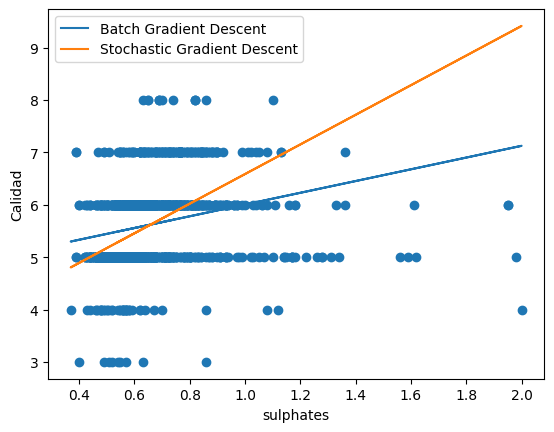

In [126]:
theta = stochastic_gd(x_train, y_train, 50, 0.1)
m,c = batch_gd(x_train, y_train, 0.1)

fig, ax = plt.subplots()
plt.plot(x_train,(x_train*m + c))
plt.plot(x_train,(x_train*theta[1] + theta[0]))
ax.scatter(x_train, y_train)
plt.xlabel('sulphates')
plt.ylabel('Calidad')
plt.legend(['Batch Gradient Descent', 'Stochastic Gradient Descent'])
plt.show()

In [127]:
y_pred_batch = x_test*m + c
y_pred_stoch = x_test*theta[1] + theta[0]

error_cuadrado = mean_squared_error(y_test,y_pred_batch)
raiz_error_cuadrado = np.sqrt(mean_squared_error(y_test,y_pred_batch))
error_absoluto_medio = mean_absolute_error(y_test,y_pred_batch)
r2 = r2_score(y_test,y_pred_batch)
r2_ajust = 1 - (1 - r2)*((len(y_test) - 1) /(len(y_test) - 2))


resultados_prediccion_vinoRojo = resultados_prediccion_vinoRojo.append(pd.Series(
    ['sulphates','batch',error_cuadrado, raiz_error_cuadrado, error_absoluto_medio, r2, r2_ajust], 
    index=['variable','tipo de RL','error cuadrático','raiz del error cuadrático','error absoluto','R2','R2 ajustado']), 
    ignore_index=True)


error_cuadrado = mean_squared_error(y_test,y_pred_stoch)
raiz_error_cuadrado = np.sqrt(mean_squared_error(y_test,y_pred_stoch))
error_absoluto_medio = mean_absolute_error(y_test,y_pred_stoch)
r2 = r2_score(y_test,y_pred_stoch)
r2_ajust = 1 - (1 - r2)*((len(y_test) - 1) /(len(y_test) - 2))


resultados_prediccion_vinoRojo = resultados_prediccion_vinoRojo.append(pd.Series(
    ['sulphates','stochastic',error_cuadrado, raiz_error_cuadrado, error_absoluto_medio, r2,r2_ajust],
    index=['variable','tipo de RL','error cuadrático','raiz del error cuadrático','error absoluto','R2','R2 ajustado']),  
    ignore_index=True)

<ipython-input-127-bf187b17898b>:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
<ipython-input-127-bf187b17898b>:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


In [128]:
resultados_prediccion_vinoRojo

,variable,tipo de RL,error cuadrático,raiz del error cuadrático,error absoluto,R2,R2 ajustado
0,alcohol,batch,0.540404,0.735122,0.568264,0.173069,0.170469
1,alcohol,stochastic,0.509881,0.714059,0.570097,0.219777,0.217323
2,sulphates,batch,0.605480,0.778126,0.650973,0.073489,0.070576
3,sulphates,stochastic,0.631680,0.794783,0.633297,0.033398,0.030358


#### Variable: Ácido cítrico

In [129]:
x = wineQualityRed['citric acid']
y = wineQualityRed['quality']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42)

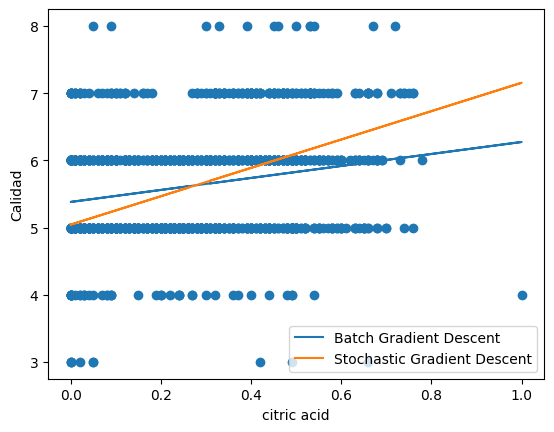

In [130]:
theta = stochastic_gd(x_train, y_train, 50, 0.1)
m,c = batch_gd(x_train, y_train, 0.1)

fig, ax = plt.subplots()
plt.plot(x_train,(x_train*m + c))
plt.plot(x_train,(x_train*theta[1] + theta[0]))
ax.scatter(x_train, y_train)
plt.xlabel('citric acid')
plt.ylabel('Calidad')
plt.legend(['Batch Gradient Descent', 'Stochastic Gradient Descent'])
plt.show()

In [131]:
y_pred_batch = x_test*m + c
y_pred_stoch = x_test*theta[1] + theta[0]

error_cuadrado = mean_squared_error(y_test,y_pred_batch)
raiz_error_cuadrado = np.sqrt(mean_squared_error(y_test,y_pred_batch))
error_absoluto_medio = mean_absolute_error(y_test,y_pred_batch)
r2 = r2_score(y_test,y_pred_batch)
r2_ajust = 1 - (1 - r2)*((len(y_test) - 1) /(len(y_test) - 2))


resultados_prediccion_vinoRojo = resultados_prediccion_vinoRojo.append(pd.Series(
    ['citric acid','batch',error_cuadrado, raiz_error_cuadrado, error_absoluto_medio, r2, r2_ajust], 
    index=['variable','tipo de RL','error cuadrático','raiz del error cuadrático','error absoluto','R2','R2 ajustado']), 
    ignore_index=True)


error_cuadrado = mean_squared_error(y_test,y_pred_stoch)
raiz_error_cuadrado = np.sqrt(mean_squared_error(y_test,y_pred_stoch))
error_absoluto_medio = mean_absolute_error(y_test,y_pred_stoch)
r2 = r2_score(y_test,y_pred_stoch)
r2_ajust = 1 - (1 - r2)*((len(y_test) - 1) /(len(y_test) - 2))


resultados_prediccion_vinoRojo = resultados_prediccion_vinoRojo.append(pd.Series(
    ['citric acid','stochastic',error_cuadrado, raiz_error_cuadrado, error_absoluto_medio, r2,r2_ajust],
    index=['variable','tipo de RL','error cuadrático','raiz del error cuadrático','error absoluto','R2','R2 ajustado']),  
    ignore_index=True)

<ipython-input-131-19132d83b650>:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
<ipython-input-131-19132d83b650>:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


### Regresiones lineales para el vino blanco

#### Tablas con los resultados de las 3 variables

In [132]:
resultados_prediccion_vinoBlanco = pd.DataFrame()

#### Tablas con los resultados de las 3 variables

In [133]:
x = wineQualityWhite['alcohol']
y = wineQualityWhite['quality']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42)

In [134]:
theta = stochastic_gd(x_train, y_train, 50)

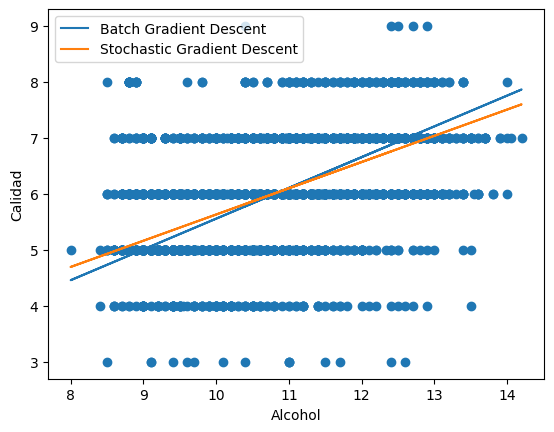

In [135]:
theta = stochastic_gd(x_train, y_train, 50)
m,c = batch_gd(x_train, y_train)

fig, ax = plt.subplots()
plt.plot(x_train,(x_train*m + c))
plt.plot(x_train,(x_train*theta[1] + theta[0]))
ax.scatter(x_train, y_train)
plt.xlabel('Alcohol')
plt.ylabel('Calidad')
plt.legend(['Batch Gradient Descent', 'Stochastic Gradient Descent'])
plt.show()

In [136]:
y_pred_batch = x_test*m + c
y_pred_stoch = x_test*theta[1] + theta[0]


error_cuadrado = mean_squared_error(y_test,y_pred_batch)
raiz_error_cuadrado = np.sqrt(mean_squared_error(y_test,y_pred_batch))
error_absoluto_medio = mean_absolute_error(y_test,y_pred_batch)
r2 = r2_score(y_test,y_pred_batch)
r2_ajust = 1 - (1 - r2)*((len(y_test) - 1) /(len(y_test) - 2))

resultados_prediccion_vinoBlanco = resultados_prediccion_vinoBlanco.append(pd.Series(
    ['alcohol','batch',error_cuadrado, raiz_error_cuadrado, error_absoluto_medio, r2, r2_ajust], 
    index=['variable','tipo de RL','error cuadrático','raiz del error cuadrático','error absoluto','R2','R2 ajustado']), 
    ignore_index=True)

error_cuadrado = mean_squared_error(y_test,y_pred_stoch)
raiz_error_cuadrado = np.sqrt(mean_squared_error(y_test,y_pred_stoch))
error_absoluto_medio = mean_absolute_error(y_test,y_pred_stoch)
r2 = r2_score(y_test,y_pred_stoch)
r2_ajust = 1 - (1 - r2)*((len(y_test) - 1) /(len(y_test) - 2))


resultados_prediccion_vinoBlanco = resultados_prediccion_vinoBlanco.append(pd.Series(
    ['alcohol','stochastic',error_cuadrado, raiz_error_cuadrado, error_absoluto_medio, r2,r2_ajust],
    index=['variable','tipo de RL','error cuadrático','raiz del error cuadrático','error absoluto','R2','R2 ajustado']),  
    ignore_index=True)

<ipython-input-136-95cd8415f679>:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
<ipython-input-136-95cd8415f679>:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



#### Variable: Sulfato

In [137]:
x = wineQualityWhite['sulphates']
y = wineQualityWhite['quality']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42)

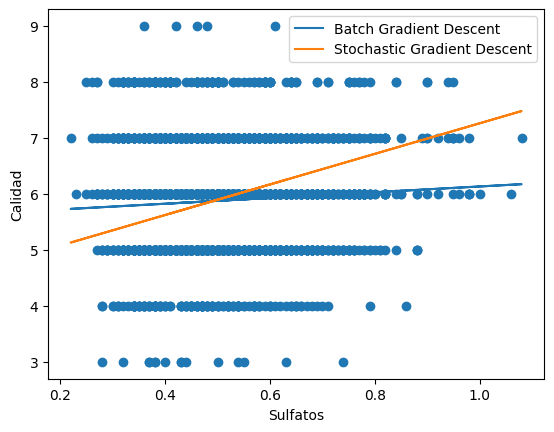

In [138]:
theta = stochastic_gd(x_train, y_train, 50, 0.1)
m,c = batch_gd(x_train, y_train, 0.1)

fig, ax = plt.subplots()
plt.plot(x_train,(x_train*m + c))
plt.plot(x_train,(x_train*theta[1] + theta[0]))
ax.scatter(x_train, y_train)
plt.xlabel('Sulfatos')
plt.ylabel('Calidad')
plt.legend(['Batch Gradient Descent', 'Stochastic Gradient Descent'])
plt.show()

In [139]:
y_pred_batch = x_test*m + c
y_pred_stoch = x_test*theta[1] + theta[0]

error_cuadrado = mean_squared_error(y_test,y_pred_batch)
raiz_error_cuadrado = np.sqrt(mean_squared_error(y_test,y_pred_batch))
error_absoluto_medio = mean_absolute_error(y_test,y_pred_batch)
r2 = r2_score(y_test,y_pred_batch)
r2_ajust = 1 - (1 - r2)*((len(y_test) - 1) /(len(y_test) - 2))


resultados_prediccion_vinoBlanco = resultados_prediccion_vinoBlanco.append(pd.Series(
    ['sulphates','batch',error_cuadrado, raiz_error_cuadrado, error_absoluto_medio, r2, r2_ajust], 
    index=['variable','tipo de RL','error cuadrático','raiz del error cuadrático','error absoluto','R2','R2 ajustado']), 
    ignore_index=True)


error_cuadrado = mean_squared_error(y_test,y_pred_stoch)
raiz_error_cuadrado = np.sqrt(mean_squared_error(y_test,y_pred_stoch))
error_absoluto_medio = mean_absolute_error(y_test,y_pred_stoch)
r2 = r2_score(y_test,y_pred_stoch)
r2_ajust = 1 - (1 - r2)*((len(y_test) - 1) /(len(y_test) - 2))


resultados_prediccion_vinoBlanco = resultados_prediccion_vinoBlanco.append(pd.Series(
    ['sulphates','stochastic',error_cuadrado, raiz_error_cuadrado, error_absoluto_medio, r2,r2_ajust],
    index=['variable','tipo de RL','error cuadrático','raiz del error cuadrático','error absoluto','R2','R2 ajustado']),  
    ignore_index=True)

<ipython-input-139-1585e051eb19>:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
<ipython-input-139-1585e051eb19>:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


#### Variable: pH

In [140]:
x = wineQualityWhite['pH']
y = wineQualityWhite['quality']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42)

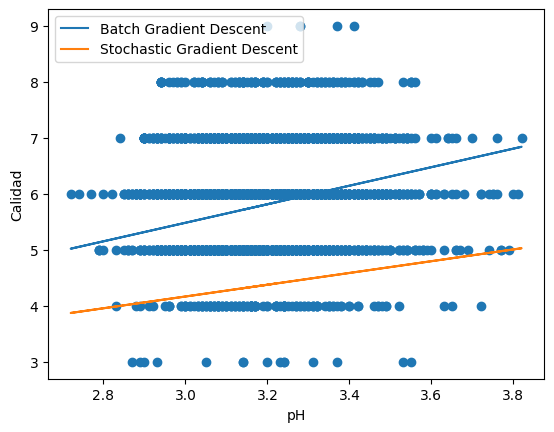

In [141]:
theta = stochastic_gd(x_train, y_train, 50, 0.0001)
m,c = batch_gd(x_train, y_train, 0.0001)

fig, ax = plt.subplots()
plt.plot(x_train,(x_train*m + c))
plt.plot(x_train,(x_train*theta[1] + theta[0]))
ax.scatter(x_train, y_train)
plt.xlabel('pH')
plt.ylabel('Calidad')
plt.legend(['Batch Gradient Descent', 'Stochastic Gradient Descent'])
plt.show()

In [142]:
y_pred_batch = x_test*m + c
y_pred_stoch = x_test*theta[1] + theta[0]

error_cuadrado = mean_squared_error(y_test,y_pred_batch)
raiz_error_cuadrado = np.sqrt(mean_squared_error(y_test,y_pred_batch))
error_absoluto_medio = mean_absolute_error(y_test,y_pred_batch)
r2 = r2_score(y_test,y_pred_batch)
r2_ajust = 1 - (1 - r2)*((len(y_test) - 1) /(len(y_test) - 2))


resultados_prediccion_vinoBlanco = resultados_prediccion_vinoBlanco.append(pd.Series(
    ['pH','batch',error_cuadrado, raiz_error_cuadrado, error_absoluto_medio, r2, r2_ajust], 
    index=['variable','tipo de RL','error cuadrático','raiz del error cuadrático','error absoluto','R2','R2 ajustado']), 
    ignore_index=True)


error_cuadrado = mean_squared_error(y_test,y_pred_stoch)
raiz_error_cuadrado = np.sqrt(mean_squared_error(y_test,y_pred_stoch))
error_absoluto_medio = mean_absolute_error(y_test,y_pred_stoch)
r2 = r2_score(y_test,y_pred_stoch)
r2_ajust = 1 - (1 - r2)*((len(y_test) - 1) /(len(y_test) - 2))


resultados_prediccion_vinoBlanco = resultados_prediccion_vinoBlanco.append(pd.Series(
    ['pH','stochastic',error_cuadrado, raiz_error_cuadrado, error_absoluto_medio, r2,r2_ajust],
    index=['variable','tipo de RL','error cuadrático','raiz del error cuadrático','error absoluto','R2','R2 ajustado']),  
    ignore_index=True)

<ipython-input-142-6b51982f580a>:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
<ipython-input-142-6b51982f580a>:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


### Métricas y resultados

In [143]:
resultados_prediccion_vinoRojo

,variable,tipo de RL,error cuadrático,raiz del error cuadrático,error absoluto,R2,R2 ajustado
0,alcohol,batch,0.540404,0.735122,0.568264,0.173069,0.170469
1,alcohol,stochastic,0.509881,0.714059,0.570097,0.219777,0.217323
2,sulphates,batch,0.605480,0.778126,0.650973,0.073489,0.070576
3,sulphates,stochastic,0.631680,0.794783,0.633297,0.033398,0.030358
4,citric acid,batch,0.612295,0.782493,0.653738,0.063062,0.060115
5,citric acid,stochastic,0.646891,0.804295,0.642169,0.010123,0.007010


In [144]:
resultados_prediccion_vinoBlanco

,variable,tipo de RL,error cuadrático,raiz del error cuadrático,error absoluto,R2,R2 ajustado
0,alcohol,batch,0.700989,0.837251,0.646535,0.094882,0.093957
1,alcohol,stochastic,0.651551,0.807187,0.631261,0.158717,0.157857
2,sulphates,batch,0.776911,0.881425,0.673697,-0.003148,-0.004173
3,sulphates,stochastic,0.864789,0.929940,0.725702,-0.116616,-0.117757
4,pH,batch,0.814059,0.902252,0.716844,-0.051114,-0.052188
5,pH,stochastic,3.154733,1.776157,1.575383,-3.073392,-3.077557


## **Conclusiones**

Al observar las distintas tablas de resultados podemos destacar tanto para el vino rojo como para el vino blanco que la variable que mejor predice la medida de calidad del vino es el alcohol, esto es concluyente por la métrica del $R^2$, la cual es utilizada para evaluar la calidad de un modelo de regresión lineal. Generalmente la métrica del $R^2$ varía entre 0 y 1, donde 0 indica que el modelo no explica la variabilidad de los datos de respuesta y 1 indica que el modelo explica perfectamente la variabilidad, lo que dado en este caso con una máxima del valor de $R^2$ en $0.218$ sugiere que el modelo no se ajusta adecuadamente a los datos y puede requerir una revisión o una elección diferente de modelo.

También podemos evaluar por la métrica del $R^2$ ajustado que penaliza por cada nueva variable predictora o característica incluida en el modelo, las cuales se ven levemente afectadas en comparación del $R^2$ simple.

Para la métrica del error cuádratico medio al elevar los errores al cuadrado, se le da mayor peso a los errores más grandes, lo que hace que el ECM penalice más a los modelos con predicciones alejadas de los valores reales. Nuevamente en esta métrica, la variable predictoria "alcohol" es la que asegura un menor error ECM. En comparación del tipo de regresión lineal utilizado, ambos algoritmos llegan a resultados similares siendo superior el stochastic gradient descent por sobre el batch gradient descent solo en en la variable "alcohol" y al contrario en todas las demás, lo que podría sugerir que mientras exista mayor correlación de la variable predictoria por sobre la dependiente stochastic minimizará de mejor forma la media de errores, pero con la desventaje de que es sensible al desajuste cuando la variable predictoria esta menos correlacionada.

Además cabe destacar que aunque ECM representa una media de los errores al cuadrado, para nada cumple la función de acotar el intervalo de confianza de la media de los datos como lo haría la desviación estándar, ya que este valor se encuentra en una escala distinta. Pero para estas situaciones es que se utiliza la raiz del error cuadrático medio (RECM) obteniendo una medida del error promedio entre las predicciones y los valores reales en la misma escala que la variable objetivo. Lo que con nuestros modelos obtenemos una medida del error promedio entre las predicciones y los valores reales menor a $1$ con la mejor variable predictoria escogida, el "alcohol".